In [1]:
import pandas as pd

# Load the dataset
file_path = '/workspaces/math/dataset_2107731.csv'
df = pd.read_csv(file_path)

# Display basic info and preview the data
print("Initial Data Overview:")
print(df.info())
print("\nPreview of data:")
print(df.head())

# Check for missing values in each column
print("\nMissing values per column:")
missing_counts = df.isna().sum()
print(missing_counts)

# Option 1: Drop rows with any missing values
# This is okay if missing data is small and random
df_cleaned = df.dropna()

# Optionally, show how many rows were dropped
rows_dropped = len(df) - len(df_cleaned)
print(f"\nRows with missing data removed: {rows_dropped}")
print(f"Remaining rows: {len(df_cleaned)}")

# Save the cleaned data if needed
# df_cleaned.to_csv('/workspaces/math/cleaned_dataset.csv', index=False)


Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ad_id        664 non-null    object 
 1   platform     685 non-null    object 
 2   impressions  685 non-null    int64  
 3   engagements  685 non-null    int64  
 4   reach        685 non-null    int64  
 5   ctr          685 non-null    float64
 6   cvr          685 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 37.6+ KB
None

Preview of data:
                                  ad_id   platform  impressions  engagements  \
0  597526f8-9ea1-407d-8bd9-e33986073446  Instagram        79372         7819   
1  e081815b-e091-4409-8c84-dfeabc9dc6eb  Instagram        67399         5449   
2  e23d8327-1841-43ec-9144-3c70e63f7368    Twitter       133972        12669   
3  4ebc0986-ba64-4373-adb0-c75182c5dc5c   LinkedIn       149003        11873   
4  986257

Total number of ads: 664

Number of ads per platform:
platform
Facebook     177
LinkedIn     174
Twitter      171
Instagram    163
Name: count, dtype: int64


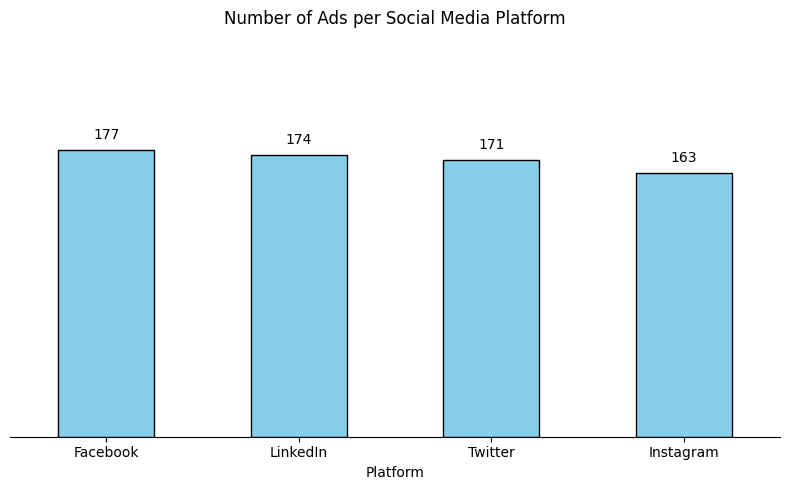

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# I do this again to load the cleaned dataset
file_path = '/workspaces/math/dataset_2107731.csv'
df = pd.read_csv(file_path)

# Total number of ads
total_ads = df['ad_id'].nunique()
print(f"Total number of ads: {total_ads}")

# Ads per platform
ads_per_platform = df['platform'].value_counts()
print("\nNumber of ads per platform:")
print(ads_per_platform)

# Visualisation
plt.figure(figsize=(8,5))
bars = ads_per_platform.plot(kind='bar', color='skyblue', edgecolor='black')

# Extend y-axis limit to 250
plt.ylim(0, 250)

# Remove top and left borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove y-axis including ticks and labels
plt.gca().set_yticks([])

# Remove x-axis ticks (but keep labels)
plt.gca().set_xticks(range(len(ads_per_platform)))
plt.gca().set_xticklabels(ads_per_platform.index, rotation=0)  # Horizontal x-axis labels

# Add number of ads above each bar
for i, v in enumerate(ads_per_platform):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.title('Number of Ads per Social Media Platform')
plt.xlabel('Platform')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

Summary statistics for impressions per ad:
count       685.000000
mean     115205.868613
std       40134.414615
min           0.000000
25%       88598.000000
50%      116818.000000
75%      142487.000000
max      236139.000000
Name: impressions, dtype: float64


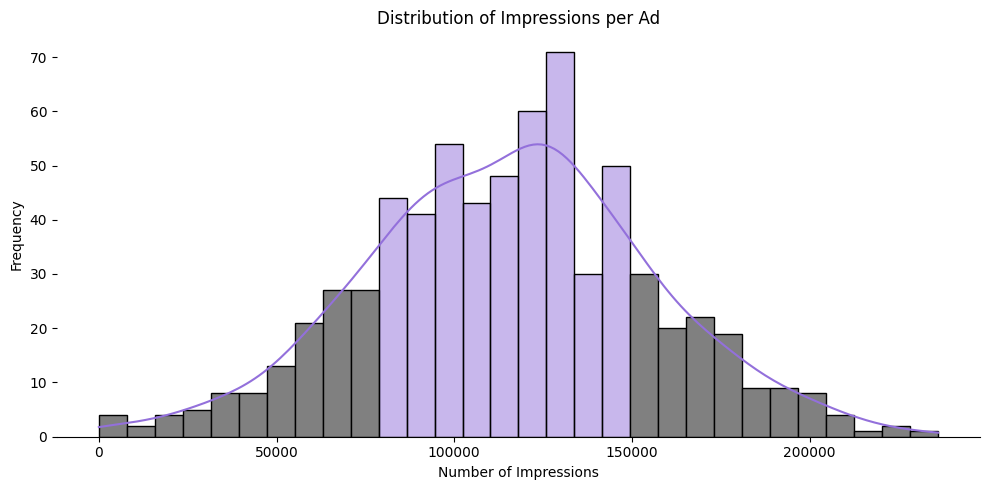

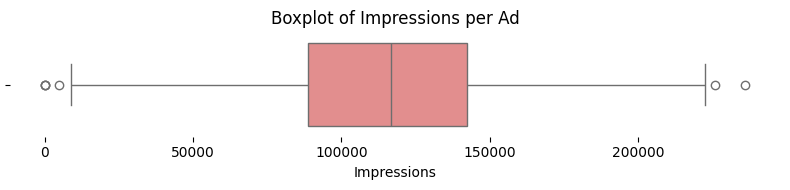

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics for impressions
impression_stats = df['impressions'].describe()
print("Summary statistics for impressions per ad:")
print(impression_stats)

plt.figure(figsize=(10,5))

# Create histogram with seaborn
hist = sns.histplot(df['impressions'], bins=30, kde=True, color='mediumpurple')

# Remove top, right, and left borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Change bar colors for impressions < 100,000 and > 150,000 to gray
for patch in hist.patches:
    x = patch.get_x() + patch.get_width() / 2  # Get center of bar
    if x < 80000 or x > 150000:
        patch.set_facecolor('gray')

plt.title('Distribution of Impressions per Ad')
plt.xlabel('Number of Impressions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,2))
sns.boxplot(x=df['impressions'], color='lightcoral')

# Remove all borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.title('Boxplot of Impressions per Ad')
plt.xlabel('Impressions')
plt.tight_layout()
plt.show()


Descriptive statistics for reach per platform:
           count          mean           std     min       25%      50%  \
platform                                                                  
Facebook   177.0  41126.655367  14761.839894     0.0  32101.00  41731.0   
Instagram  163.0  44301.815951  15708.608144     0.0  34456.00  43052.0   
LinkedIn   174.0  17129.729885   6611.656300  3269.0  12761.25  16472.5   
Twitter    171.0  28568.719298  11025.139653     0.0  20347.00  29004.0   

                75%      max  
platform                      
Facebook   50578.00  81413.0  
Instagram  52800.00  98843.0  
LinkedIn   21346.75  36385.0  
Twitter    36333.00  60415.0  


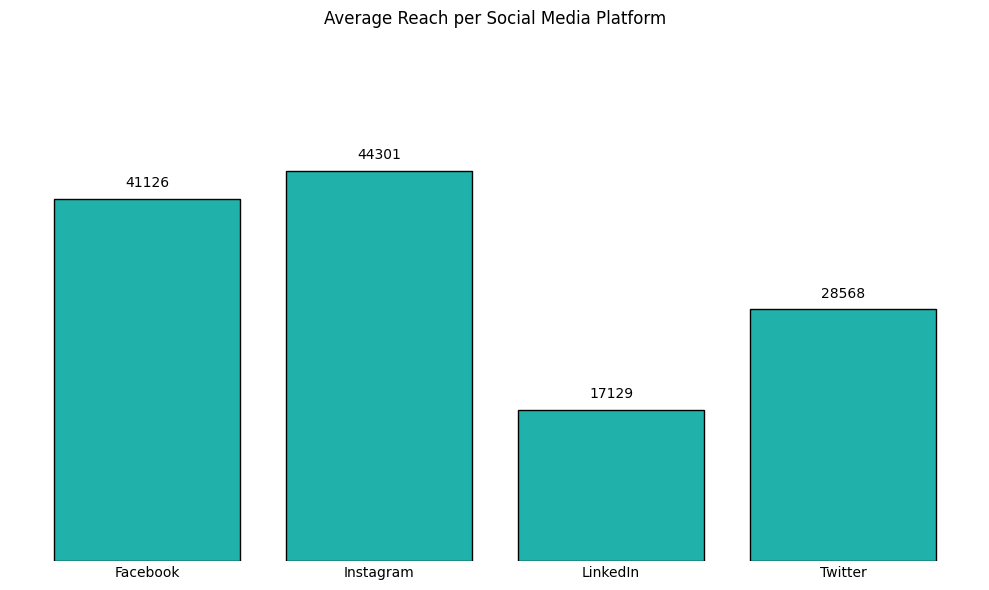

In [4]:
# Descriptive statistics for reach per platform
reach_stats = df.groupby('platform')['reach'].describe()
print("Descriptive statistics for reach per platform:")
print(reach_stats)

# Bar chart for average reach per platform
avg_reach_per_platform = df.groupby('platform')['reach'].mean()

plt.figure(figsize=(10,6))
bars = plt.bar(avg_reach_per_platform.index, avg_reach_per_platform, color='lightseagreen', edgecolor='black')

# Set y-axis limit to 60000
plt.ylim(0, 60000)

# Remove top, left, right, and bottom borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove y-axis including ticks and labels
plt.gca().set_yticks([])

# Remove x-axis ticks but keep horizontal labels
plt.gca().set_xticks(range(len(avg_reach_per_platform)))  # Set tick positions
plt.gca().set_xticklabels(avg_reach_per_platform.index, rotation=0)  # Horizontal labels
plt.tick_params(axis='x', length=0)  # Hide x-axis tick marks

# Add average reach above each bar (rounded for readability)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{int(height)}', ha='center', va='bottom')

plt.title('Average Reach per Social Media Platform')
plt.xlabel('')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

Overall average engagement rate: 0.0817

Average engagement rate per platform:
platform
Facebook     0.079610
Instagram    0.102159
LinkedIn     0.067858
Twitter      0.078646
Name: engagement_rate, dtype: float64


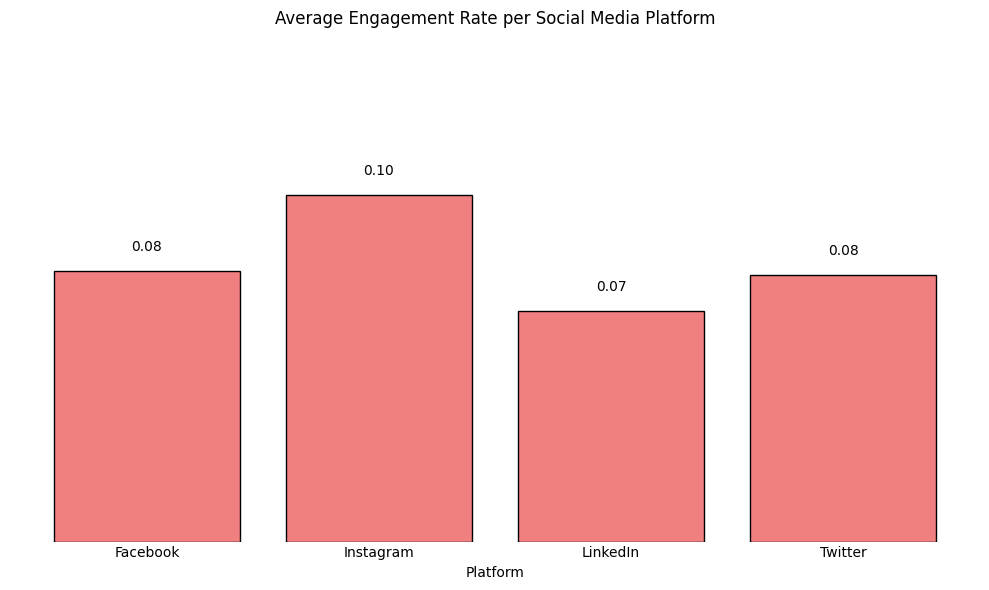

In [5]:
# Step 1: Compute the engagement rate for each ad
df['engagement_rate'] = df['engagements'] / df['impressions']

# Step 2: Compute the overall average engagement rate
average_engagement_rate = df['engagement_rate'].mean()
print(f"Overall average engagement rate: {average_engagement_rate:.4f}")

# Step 3: Compute the average engagement rate per platform
avg_engagement_rate_per_platform = df.groupby('platform')['engagement_rate'].mean()
print("\nAverage engagement rate per platform:")
print(avg_engagement_rate_per_platform)

# Bar chart for average engagement rate per platform
plt.figure(figsize=(10,6))
bars = plt.bar(avg_engagement_rate_per_platform.index, avg_engagement_rate_per_platform, color='lightcoral', edgecolor='black')

# Set y-axis limit to 0.15
plt.ylim(0, 0.15)

# Remove top, left, right, and bottom borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove y-axis including ticks and labels
plt.gca().set_yticks([])

# Remove x-axis ticks but keep horizontal labels
plt.gca().set_xticks(range(len(avg_engagement_rate_per_platform)))  # Set tick positions
plt.gca().set_xticklabels(avg_engagement_rate_per_platform.index, rotation=0)  # Horizontal labels
plt.tick_params(axis='x', length=0)  # Hide x-axis tick marks

# Add average engagement rate above each bar (rounded to 2 decimal places for readability)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.2f}', ha='center', va='bottom')

plt.title('Average Engagement Rate per Social Media Platform')
plt.xlabel('Platform')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()


In [6]:
# General engagement rate (without platform split)
total_engagements = df['engagements'].sum()
total_impressions = df['impressions'].sum()

general_engagement_rate = total_engagements / total_impressions
print(f"General Engagement Rate (Overall): {general_engagement_rate:.4f}")


General Engagement Rate (Overall): 0.0861


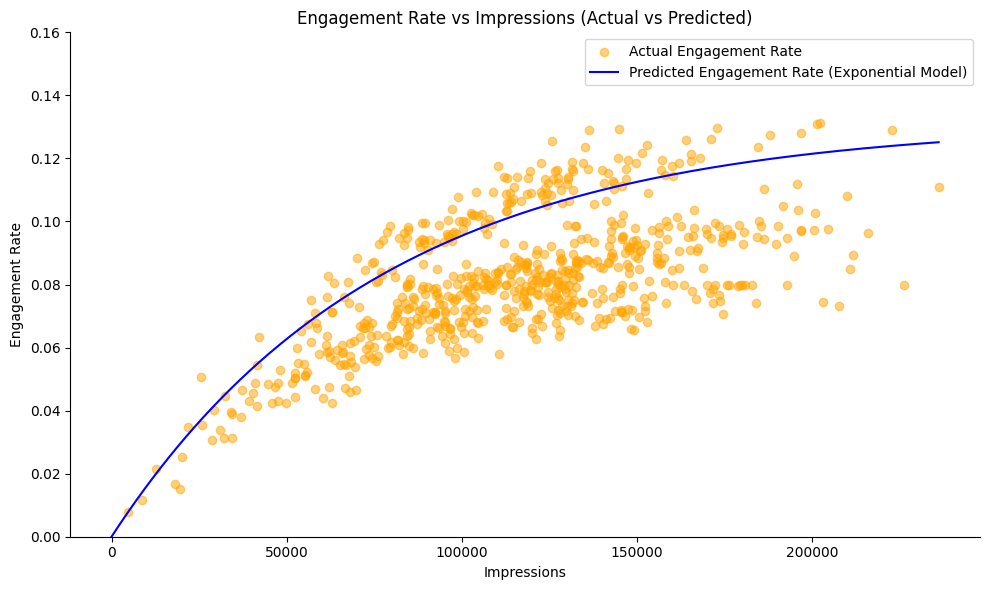

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate the engagement rate for each ad
df['engagement_rate'] = df['engagements'] / df['impressions']

# Step 2: Find the maximum engagement rate (a)
a = df['engagement_rate'].max()

# Step 3: Apply the exponential saturation model to compute predicted engagement rates
b = 0.000013  # Growth factor
impressions_range = np.linspace(df['impressions'].min(), df['impressions'].max(), 500)
predicted_engagement_rate = a * (1 - np.exp(-b * impressions_range))

# Step 4: Plot the actual engagement rate vs. impressions and predicted engagement rate vs. impressions
plt.figure(figsize=(10,6))
plt.scatter(df['impressions'], df['engagement_rate'], alpha=0.5, color='orange', label='Actual Engagement Rate')
plt.plot(impressions_range, predicted_engagement_rate, color='blue', label='Predicted Engagement Rate (Exponential Model)')

# Extend y-axis to 0.16
plt.ylim(0, 0.16)

# Remove right and top borders (spines)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.title('Engagement Rate vs Impressions (Actual vs Predicted)')
plt.xlabel('Impressions')
plt.ylabel('Engagement Rate')
plt.legend()
plt.tight_layout()
plt.show()


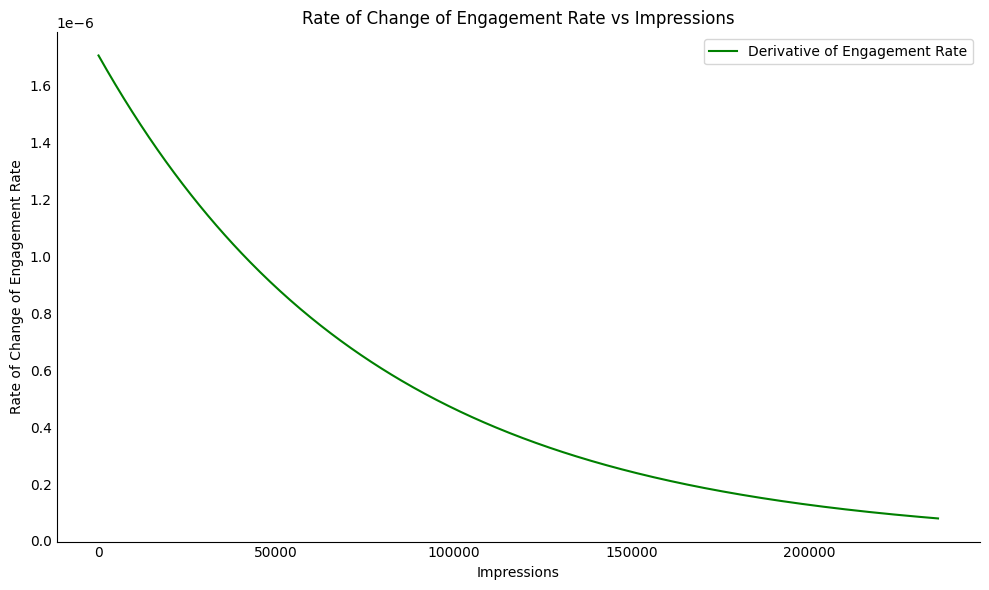

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = df['engagement_rate'].max()  # Maximum engagement rate from the data
b = 0.000013  # Growth factor from the problem statement

# Define the first derivative function
def engagement_rate_derivative(impressions, a, b):
    return a * b * np.exp(-b * impressions)

# Create a range of impressions (from minimum to maximum impressions in the dataset)
impressions_range = np.linspace(df['impressions'].min(), df['impressions'].max(), 500)

# Calculate the derivative (rate of change) of the engagement rate
derivative_values = engagement_rate_derivative(impressions_range, a, b)

# Plot the derivative (rate of change of engagement rate)
plt.figure(figsize=(10,6))
plt.plot(impressions_range, derivative_values, color='green', label='Derivative of Engagement Rate')

# Remove right and top borders (spines)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Remove ticks on both axes but keep values (labels)
plt.tick_params(axis='x', length=0)  # Remove x-axis ticks
plt.tick_params(axis='y', length=0)  # Remove y-axis ticks

plt.title('Rate of Change of Engagement Rate vs Impressions')
plt.xlabel('Impressions')
plt.ylabel('Rate of Change of Engagement Rate')
plt.legend()
plt.tight_layout()
plt.show()


Descriptive Statistics of CTR by Platform:
            count      mean       std       min       25%       50%       75%  \
platform                                                                       
Facebook   177.0  0.059344  0.005159  0.043674  0.056260  0.059471  0.063206   
Instagram  163.0  0.074866  0.004258  0.061185  0.071757  0.074891  0.077379   
LinkedIn   174.0  0.024798  0.004967  0.011186  0.021697  0.024738  0.027925   
Twitter    171.0  0.044412  0.004909  0.027778  0.041329  0.043940  0.047816   

                max  
platform             
Facebook   0.070826  
Instagram  0.086286  
LinkedIn   0.038092  
Twitter    0.057761  


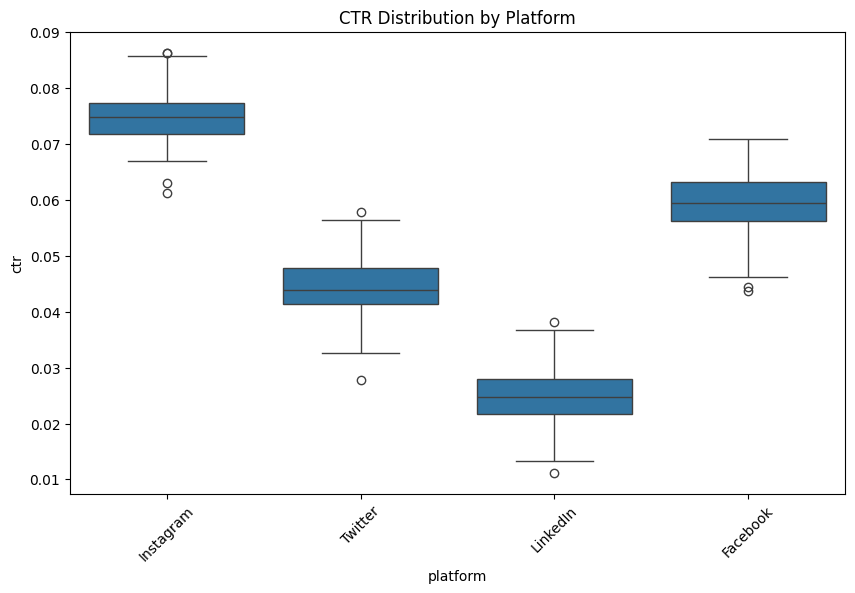

ANOVA Results: F-statistic = 3292.5835, p-value = 0.0000
There is a statistically significant difference in CTR across platforms.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Read the data (assuming it’s already cleaned)
data = pd.read_csv('/workspaces/math/dataset_2107731.csv')

# Step 1: Descriptive analysis of CTR by platform
ctr_summary = data.groupby('platform')['ctr'].describe()
print("Descriptive Statistics of CTR by Platform:\n", ctr_summary)

# Step 2: Visualization of CTR distribution by platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='ctr', data=data)
plt.title('CTR Distribution by Platform')
plt.xticks(rotation=45)
plt.show()

# Step 3: Inferential Analysis using ANOVA
# ANOVA test to compare CTR means across platforms
platforms = data['platform'].unique()
platforms_data = [data[data['platform'] == platform]['ctr'] for platform in platforms]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*platforms_data)

# Output the results
print(f"ANOVA Results: F-statistic = {f_statistic:.4f}, p-value = {p_value:.4f}")

# Step 4: Reflection on results
if p_value < 0.05:
    print("There is a statistically significant difference in CTR across platforms.")
else:
    print("There is no statistically significant difference in CTR across platforms.")


In [10]:
import pandas as pd
from scipy import stats

# Load the data
df = pd.read_csv('/workspaces/math/dataset_2107731.csv')

# Drop rows with missing CVR or platform
df_clean = df.dropna(subset=['cvr', 'platform'])

# Filter data for LinkedIn and Twitter
linkedin_cvr = df_clean[df_clean['platform'] == 'LinkedIn']['cvr']
twitter_cvr = df_clean[df_clean['platform'] == 'Twitter']['cvr']

# Descriptive stats
print("LinkedIn CVR:")
print(linkedin_cvr.describe())
print("\nTwitter CVR:")
print(twitter_cvr.describe())

# One-tailed t-test: H0: LinkedIn CVR <= Twitter CVR; H1: LinkedIn CVR > Twitter CVR
t_stat, p_value = stats.ttest_ind(linkedin_cvr, twitter_cvr, equal_var=False, alternative='greater')

print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value (one-tailed): {p_value:.4f}")


LinkedIn CVR:
count    174.000000
mean       0.089823
std        0.001962
min        0.084328
25%        0.088554
50%        0.089985
75%        0.091202
max        0.094257
Name: cvr, dtype: float64

Twitter CVR:
count    171.000000
mean       0.030278
std        0.001972
min        0.024267
25%        0.029122
50%        0.030252
75%        0.031472
max        0.036098
Name: cvr, dtype: float64

T-statistic: 281.1341
P-value (one-tailed): 0.0000


In [15]:
facebook_ads = df[df['platform'].str.contains('facebook', case=False, na=False)]  # Case-insensitive filter


In [16]:
print(facebook_ads.shape)  # It should return the number of rows with Facebook ads


(177, 7)


In [21]:
import scipy.stats as stats

# Get the CVR values for Facebook ads
cvr_facebook = facebook_ads['cvr']

# Calculate the mean and standard error of the CVR for Facebook ads
mean_cvr_facebook = cvr_facebook.mean()
std_error_facebook = cvr_facebook.std() / (len(cvr_facebook) ** 0.5)

# Calculate the 95% confidence interval
confidence_interval = stats.t.interval(0.95, len(cvr_facebook)-1, loc=mean_cvr_facebook, scale=std_error_facebook)
print("95% Confidence Interval for Facebook Ads CVR:", confidence_interval)


95% Confidence Interval for Facebook Ads CVR: (np.float64(0.06977565468658806), np.float64(0.07036475460830233))


In [22]:
import scipy.stats as stats

# Given values
mean_cvr = 0.0812  # True average conversion rate (8.12%)
std_dev_cvr = 0.001  # Standard deviation
percentile = 0.90  # Top 10% (90th percentile)

# Calculate the Z-score for the 90th percentile
z_score_90th = stats.norm.ppf(percentile)

# Calculate the conversion rate for the top 10% performing ads
top_10_cvr = mean_cvr + z_score_90th * std_dev_cvr

print(f"Conversion rate for the top 10% performing ads: {top_10_cvr:.6f}")


Conversion rate for the top 10% performing ads: 0.082482


In [27]:
# Create the engagement_rate column if not already created
df['engagement_rate'] = df['engagements'] / df['impressions']

# Check if the column is added
print(df.head())


                                  ad_id   platform  impressions  engagements  \
0  597526f8-9ea1-407d-8bd9-e33986073446  Instagram        79372         7819   
1  e081815b-e091-4409-8c84-dfeabc9dc6eb  Instagram        67399         5449   
2  e23d8327-1841-43ec-9144-3c70e63f7368    Twitter       133972        12669   
3  4ebc0986-ba64-4373-adb0-c75182c5dc5c   LinkedIn       149003        11873   
4  98625736-85b4-4950-b0e6-67fdf2247ef4   Facebook       200453        19525   

   reach       ctr       cvr  engagement_rate  
0  31309  0.077432  0.074029         0.098511  
1  25471  0.075589  0.068557         0.080847  
2  32831  0.043693  0.028935         0.094565  
3  20062  0.031999  0.091437         0.079683  
4  79341  0.061076  0.070674         0.097404  


In [29]:
import numpy as np
from scipy.stats import norm

# Step 2: Calculate the mean and standard deviation of the engagement rates
mean_engagement_rate = np.mean(df['engagement_rate'])
std_engagement_rate = np.std(df['engagement_rate'])

# Step 3: Calculate the z-score for an engagement rate of 11%
threshold = 0.11
z_score = (threshold - mean_engagement_rate) / std_engagement_rate

# Step 4: Calculate the probability that the engagement rate exceeds 11%
probability_exceeds_11 = 1 - norm.cdf(z_score)

# Output the result
print(f"Probability that an ad has an engagement rate exceeding 11%: {probability_exceeds_11:.4f}")


Probability that an ad has an engagement rate exceeding 11%: 0.0772


In [31]:
# Step 1: Filter data for Instagram and Facebook ads
instagram_ads = df[df['platform'] == 'Instagram']
facebook_ads = df[df['platform'] == 'Facebook']

# Step 2: Compute the engagement rate for each ad using .loc to avoid the warning
instagram_ads.loc[:, 'engagement_rate'] = instagram_ads['engagements'] / instagram_ads['impressions']
facebook_ads.loc[:, 'engagement_rate'] = facebook_ads['engagements'] / facebook_ads['impressions']

# Step 3: Calculate the probability of engagement rate exceeding 11% for Instagram and Facebook ads
prob_instagram = (instagram_ads['engagement_rate'] > 0.11).mean()
prob_facebook = (facebook_ads['engagement_rate'] > 0.11).mean()

# Step 4: Print the results
print(f"Probability that an Instagram ad has an engagement rate > 11%: {prob_instagram:.4f}")
print(f"Probability that a Facebook ad has an engagement rate > 11%: {prob_facebook:.4f}")


Probability that an Instagram ad has an engagement rate > 11%: 0.3742
Probability that a Facebook ad has an engagement rate > 11%: 0.0169


In [32]:
import scipy.stats as stats

# Prior probability (success rate last year) from previous analysis
prior_success_rate = 0.0772

# Sample data from this year
sample_size = 50
successful_ads_this_year = 2

# Likelihood: Binomial distribution (probability of observing successful_ads_this_year successes)
# given the prior_success_rate as the probability of success
likelihood = stats.binom.pmf(successful_ads_this_year, sample_size, prior_success_rate)

# Prior: assuming uniform distribution or a simple prior belief based on last year's rate
prior = prior_success_rate  # This could be any distribution or value based on historical knowledge

# Posterior: Calculate using Bayes' theorem
# P(data | prior) * P(prior) / P(data), but for simplicity, we're just using the binomial likelihood
# and assuming a uniform prior
posterior_success_rate = (likelihood * prior)  # Unnormalized posterior (proportional)

# To normalize, we calculate the probability of the data (normalizer constant)
# For a Binomial likelihood, P(data) is the sum of the likelihood over all possible prior values
normalizer = sum([stats.binom.pmf(successful_ads_this_year, sample_size, p) * p for p in [0.01 * i for i in range(101)]])
posterior_success_rate /= normalizer

# Output the updated (posterior) probability of success
print(f"Updated (posterior) probability of a successful ad: {posterior_success_rate:.4f}")


Updated (posterior) probability of a successful ad: 0.1053


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Given data
alpha_prior = 1  # Prior shape parameter for success rate (uniform prior)
beta_prior = 1   # Prior shape parameter for success rate (uniform prior)
success_rate = 0.11  # Industry standard success rate
n = 50  # Total number of ads in the sample
successes = 2  # Number of ads exceeding the industry standard

# Update the posterior with the sample data
alpha_posterior = alpha_prior + successes
beta_posterior = beta_prior + (n - successes)

# Define the posterior distribution (Beta distribution)
posterior_distribution = beta(alpha_posterior, beta_posterior)

# Probability that the success rate exceeds the industry standard (0.11)
prob_success_rate_above_11 = 1 - posterior_distribution.cdf(success_rate)

# Output the result
print(f"Probability that the success rate exceeds 11%: {prob_success_rate_above_11:.4f}")


Probability that the success rate exceeds 11%: 0.0703


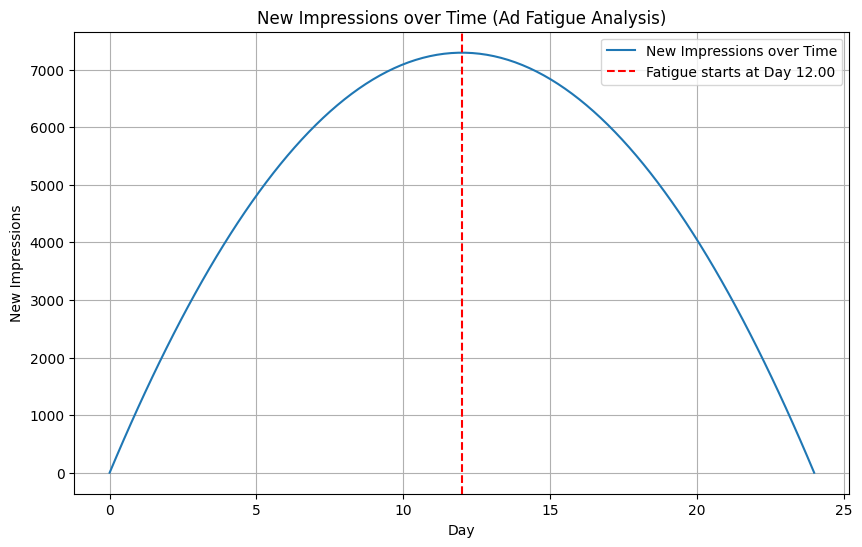

Ad fatigue starts after day 12.00
Impressions reach zero after day 24.00


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the quadratic function
a = -50.64
b = 1215.36

# Calculate the day at which ad fatigue starts (vertex)
t_fatigue_start = -b / (2 * a)

# Solve the quadratic equation to find when impressions become zero
# -50.64t^2 + 1215.36t = 0
# t( -50.64t + 1215.36) = 0, hence t = 0 or t = 1215.36 / 50.64
t_zero = b / -a

# Create a range of days (0 to t_zero, since impressions become 0 after t_zero)
t_values = np.linspace(0, t_zero, 100)
impressions = a * t_values**2 + b * t_values

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t_values, impressions, label='New Impressions over Time')
plt.axvline(x=t_fatigue_start, color='r', linestyle='--', label=f'Fatigue starts at Day {t_fatigue_start:.2f}')
plt.title('New Impressions over Time (Ad Fatigue Analysis)')
plt.xlabel('Day')
plt.ylabel('New Impressions')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
print(f"Ad fatigue starts after day {t_fatigue_start:.2f}")
print(f"Impressions reach zero after day {t_zero:.2f}")


In [38]:
import numpy as np
from scipy.integrate import quad

# Define the quadratic function for new impressions
def new_impressions(t):
    return -50.64 * t**2 + 1215.36 * t

# Set the time range from 0 to 12 days
t_start = 0
t_end = 12

# Perform the numerical integration to calculate total impressions from day 0 to day 12
total_impressions, _ = quad(new_impressions, t_start, t_end)

print(f"Total impressions generated before ad fatigue starts: {total_impressions:.2f}")


Total impressions generated before ad fatigue starts: 58337.28
